In [224]:
# Model design
import agentpy as ap
import joblib
import numpy as np
from frozendict import frozendict
import json
from matplotlib import rc
import os

# Visualization
import seaborn as sns
import pandas as pd

import scipy.stats
import datetime
import matplotlib.pyplot as plt

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import networkx as nx

from sklearn.ensemble import IsolationForest
from sklearn import mixture
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import tree
from scipy.stats import ks_2samp

from sklearn.tree import export_text

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support


from numpy.random import default_rng
from sklearn.metrics import classification_report

In [186]:
#sender_info['y_true'] = sender_info['true_sender_type'].apply(lambda x: 1 if x =='suspicious' else 0)
#sender_info.drop(columns=['Unnamed: 0'], inplace=True)
#sender_info.rename(columns={'true_sender_type':'agent_y_true'}, inplace=True)

In [220]:
y_true.value_counts()

0    989
1     10
Name: y_true, dtype: int64

In [228]:
sender_info

,sender_id,txns,txn_mean_time,in_degree,out_degree,num_txns,agent_y_true,y_true,y_pred
591,600,"[42, 63]",51.333333,1,2,2,normal,0,0
906,917,[38],58.000000,0,1,1,normal,0,0
566,574,"[38, 78]",54.000000,1,2,2,normal,0,0
221,224,[48],38.000000,1,1,1,normal,0,0
971,983,"[46, 54]",59.500000,1,2,2,normal,0,0
...,...,...,...,...,...,...,...,...,...
644,653,"[44, 54, 55, 57]",52.000000,2,4,4,normal,0,0
215,218,"[55, 63]",53.000000,1,2,2,normal,0,0
588,597,"[49, 52]",55.000000,1,2,2,normal,0,0
902,913,"[48, 52, 55]",61.500000,2,3,3,normal,0,0


0    990
1      9
Name: y_pred, dtype: int64


,sender_id,txns,txn_mean_time,in_degree,out_degree,num_txns,agent_y_true,y_true,y_pred
603,612,[33],56.500000,1,1,1,normal,0,0
591,600,"[42, 63]",51.333333,1,2,2,normal,0,0
717,727,[47],46.000000,1,1,1,normal,0,0
200,201,[52],53.000000,0,1,1,normal,0,0
765,775,"[51, 60]",55.000000,2,2,2,normal,0,0
...,...,...,...,...,...,...,...,...,...
786,796,[58],47.500000,0,1,1,normal,0,0
560,568,"[50, 57]",46.000000,1,2,2,normal,0,0
754,764,"[52, 62]",49.500000,2,2,2,normal,0,0
723,733,[56],39.500000,1,1,1,normal,0,0


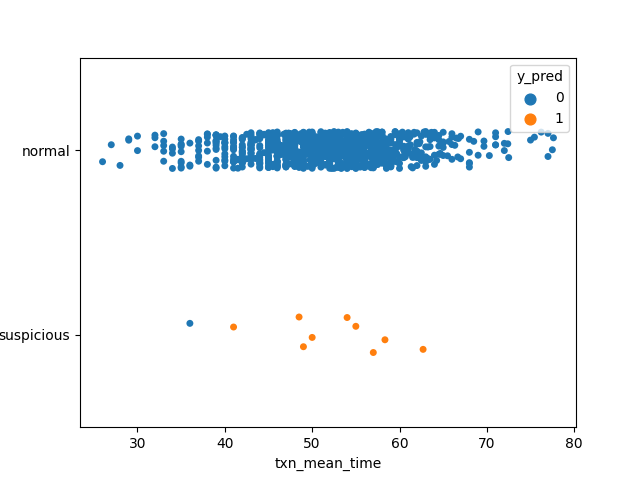

In [247]:
# decision tree
def reset_X():
    sender_info = pd.read_csv('sender_info.csv')
    sender_info = sender_info.sample(frac=1)
    X = sender_info[['sender_id', 'txn_mean_time', 'y_true', 'in_degree']]
    return sender_info, X

rand_generator = np.random.default_rng()
sender_info, X = reset_X()

X.y_true.value_counts()
#train_X = X[['txn_mean_time', 'in_degree']]
train_X = sender_info[['txn_mean_time','in_degree', 'out_degree']]
train_X = sender_info[['txn_mean_time', 'num_txns']]
train_X = train_X#.to_numpy()#.reshape(-1,1)
y_true = X.y_true
y_true.value_counts()


#clf = mixture.GaussianMixture()
#clf = IsolationForest(contamination=0.1, random_state=123).fit(train_X)
clf = tree.DecisionTreeClassifier(max_depth=4)
clf.fit(train_X, sender_info.y_true)
y_pred = clf.predict(train_X)
sender_info['y_pred'] = y_pred
print(sender_info.y_pred.value_counts())

display(sender_info)
#sender_info['y_pred'] = sender_info['y_pred']#.apply(lambda x: 1 if x== else 0)
#sender_info.sample()
fig, ax = plt.subplots()
#sns.stripplot(data=sender_info, x='txn_mean_time', y='agent_y_true', hue='y_pred')
sns.stripplot(data=sender_info, x='txn_mean_time', y='agent_y_true', hue='y_pred')
plt.show()

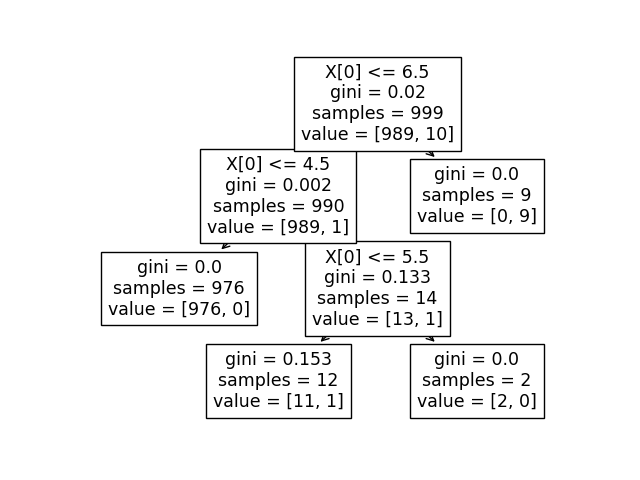

In [244]:
plt.subplots()
sns.reset_defaults()
tree.plot_tree(clf)
plt.show()


In [232]:
acc = accuracy_score(y_true, y_pred)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       989
           1       1.00      1.00      1.00        10

    accuracy                           1.00       999
   macro avg       1.00      1.00      1.00       999
weighted avg       1.00      1.00      1.00       999

